# Importing Packages

In [149]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose


# Reading in Historical Stock Prices

In [2]:
df = pd.read_csv("S_P_500_Stock.csv")
df.head()

,Date,Close/Last,Open,High,Low
0,11/08/2024,5995.54,5976.76,6012.45,5976.76
1,11/07/2024,5973.10,5947.21,5983.84,5947.21
2,11/06/2024,5929.04,5864.89,5936.14,5864.89
3,11/05/2024,5782.76,5722.43,5783.44,5722.10
4,11/04/2024,5712.69,5725.15,5741.43,5696.51


In [3]:
df.shape

(2527, 5)

In [4]:
df.dtypes

Date           object
Close/Last    float64
Open          float64
High          float64
Low           float64
dtype: object

# Cleaning Data

In [5]:
# Dropping NA values
df = df.dropna()

#Converting Date to Datetime Format
df["Date"] = pd.to_datetime(df["Date"])

#Renaming Close Column
df.rename(columns={'Close/Last': 'Close'}, inplace=True)

# Remove dollar sign and convert to float
df[['Close', 'Open', 'High', 'Low']] = np.round(df[['Close', 'Open', 'High', 'Low']].replace({'\$': ''}, regex=True).astype(float), 2)

df = df[::-1]
df.head()


<positron-console-cell-5>:11: SyntaxWarning: invalid escape sequence '\$'


,Date,Close,Open,High,Low
2526,2014-11-11,2039.68,2038.20,2041.28,2035.28
2525,2014-11-12,2038.25,2037.75,2040.33,2031.95
2524,2014-11-13,2039.33,2039.21,2046.18,2030.44
2523,2014-11-14,2039.82,2039.74,2042.22,2035.20
2522,2014-11-17,2041.32,2038.29,2043.07,2034.46


# Summary Statistics

In [6]:
round(df.describe(), 2)

,Date,Close,Open,High,Low
count,2527,2527.00,2527.00,2527.00,2527.00
mean,2019-11-03 19:14:30.439256064,3295.95,3286.45,3303.99,3267.65
min,2014-11-11 00:00:00,1829.08,0.00,0.00,0.00
25%,2017-05-01 12:00:00,2384.73,2385.10,2392.27,2370.04
50%,2019-11-01 00:00:00,2964.33,2964.66,2979.39,2945.53
75%,2022-05-05 12:00:00,4167.20,4166.36,4187.32,4139.27
max,2024-11-08 00:00:00,5995.54,5976.76,6012.45,5976.76
std,NaN,1049.11,1067.93,1073.64,1062.25


# Data Visualizations

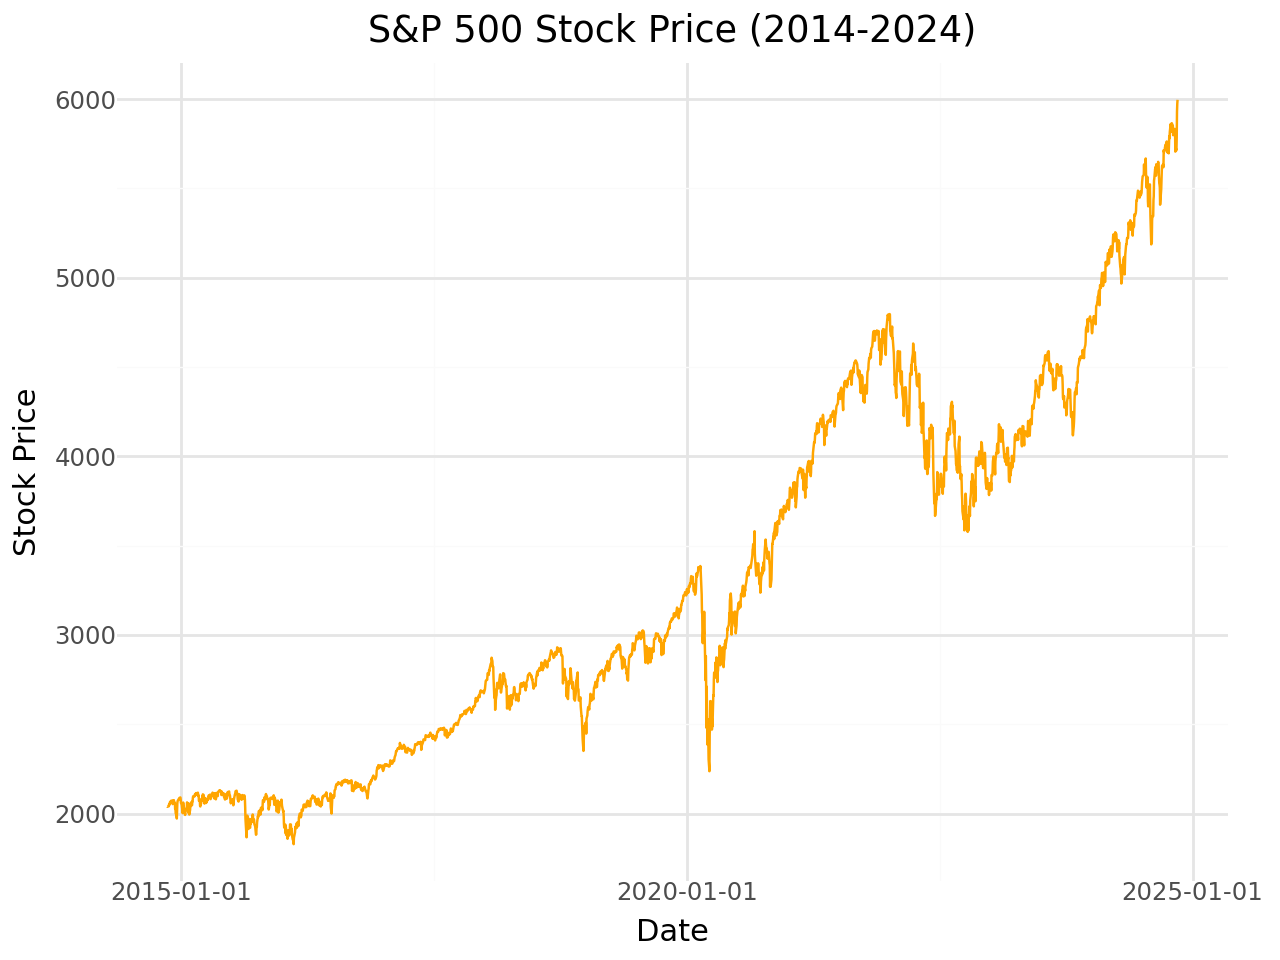

In [7]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

(ggplot(df, aes(x = "Date", y = "Close")) +
    geom_line(color = "orange") +
    labs(title = "S&P 500 Stock Price (2014-2024)",
         x = "Date",
         y = "Stock Price") +
    theme_minimal())

<div style="font-size: 24px; color: red;">There is a clear upwards trend for the S&P 500's stock price in the last 5 Years. There was a major dip in share price in 2020 due to Covid, but stock recoverd shortly after.<div>

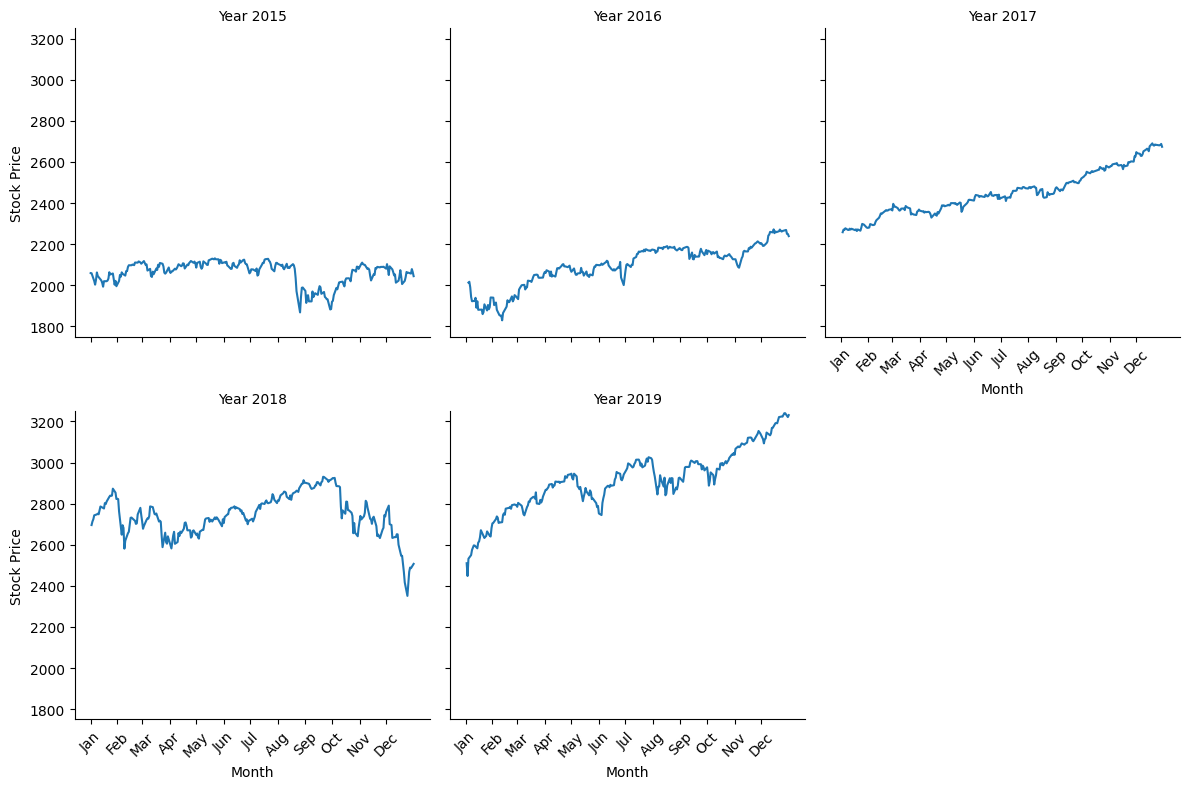

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure your 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year, day of year, and month from the 'Date' column
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear  # Day number within the year (1-366)
df['month'] = df['Date'].dt.month  # Month as number (1-12)
df['month_name'] = df['Date'].dt.month_name()  # Month name (e.g., "January", "February")

# Filter for the years 2015-2019
df_filtered = df[df['year'].between(2015, 2019)]

# Create the FacetGrid, which will facet the plot by year
g = sns.FacetGrid(df_filtered, col='year', col_wrap=3, height=4)  # col_wrap arranges plots in rows
g.map(sns.lineplot, 'day_of_year', 'Close')

# Adjust the axis labels and title
g.set_axis_labels('Month', 'Stock Price')
g.set_titles('Year {col_name}')

# Set x-axis ticks to be month names
for ax in g.axes.flat:
    # Map day_of_year to months
    ax.set_xticks([1, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334])  # Approximate day of the year for each month
    
    # Set the tick labels to month names
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    ax.set_ylim(1750, 3250)

    # Rotate x-axis labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<div style="font-size: 24px; color: red;">2015 and 2018 saw small overall net movement despite the fluctuations throughout the year. However, 2016, 2017, and 109 saw more noticable and impactful overall net increases in share price.<div>

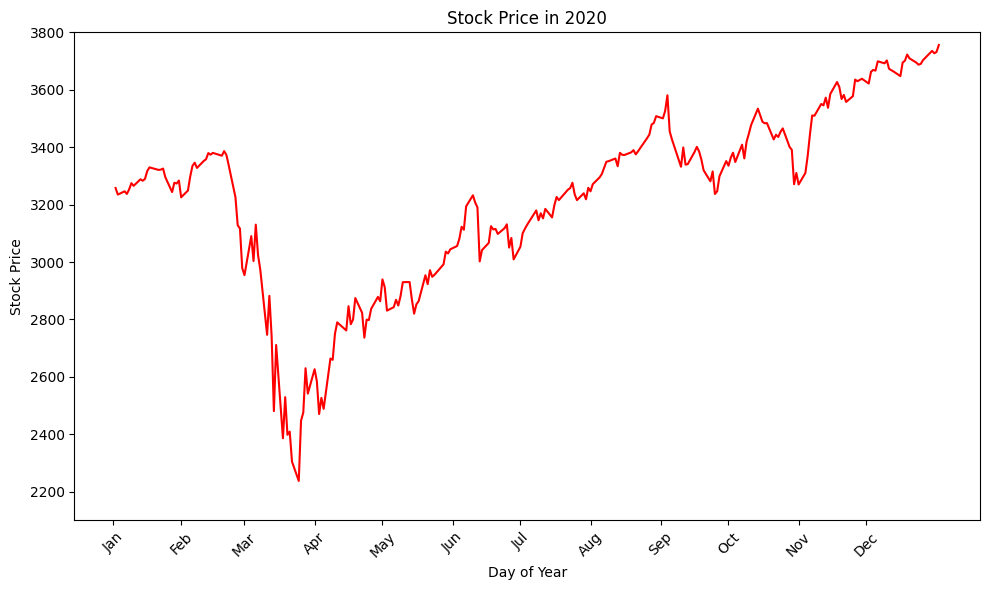

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure your 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year, day of year, and month from the 'Date' column
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear  # Day number within the year (1-366)
df['month'] = df['Date'].dt.month  # Month as number (1-12)
df['month_name'] = df['Date'].dt.month_name()  # Month name (e.g., "January", "February")

# Filter for data from the year 2020
df_2020 = df[df['year'] == 2020]

# Create the plot for 2020
plt.figure(figsize=(10, 6))

# Plot the data for 2020
sns.lineplot(data=df_2020, x='day_of_year', y='Close', color = "red")

# Adjust the axis labels and title
plt.xlabel('Day of Year')
plt.ylabel('Stock Price')
plt.title('Stock Price in 2020')

# Set x-axis ticks to be month names
plt.xticks(
    [1, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334],  # Approximate day of the year for each month
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

# Set y-axis limits (optional, adjust based on your data)
plt.ylim(2100, 3800)  # Adjust the y-axis range as needed

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<div style="font-size: 24px; color: red;">The disastrous impact of Covid on the US economy. The S&P 500 share price dropped by over $1000 per share in less than a month. However, from April to the end of the year, the stock share price saw a gradual increase back to and even exceeding the share price before Covid. There was one notable drop in the stock in September and late October due to re-emerging Covid outbreaks.<div>

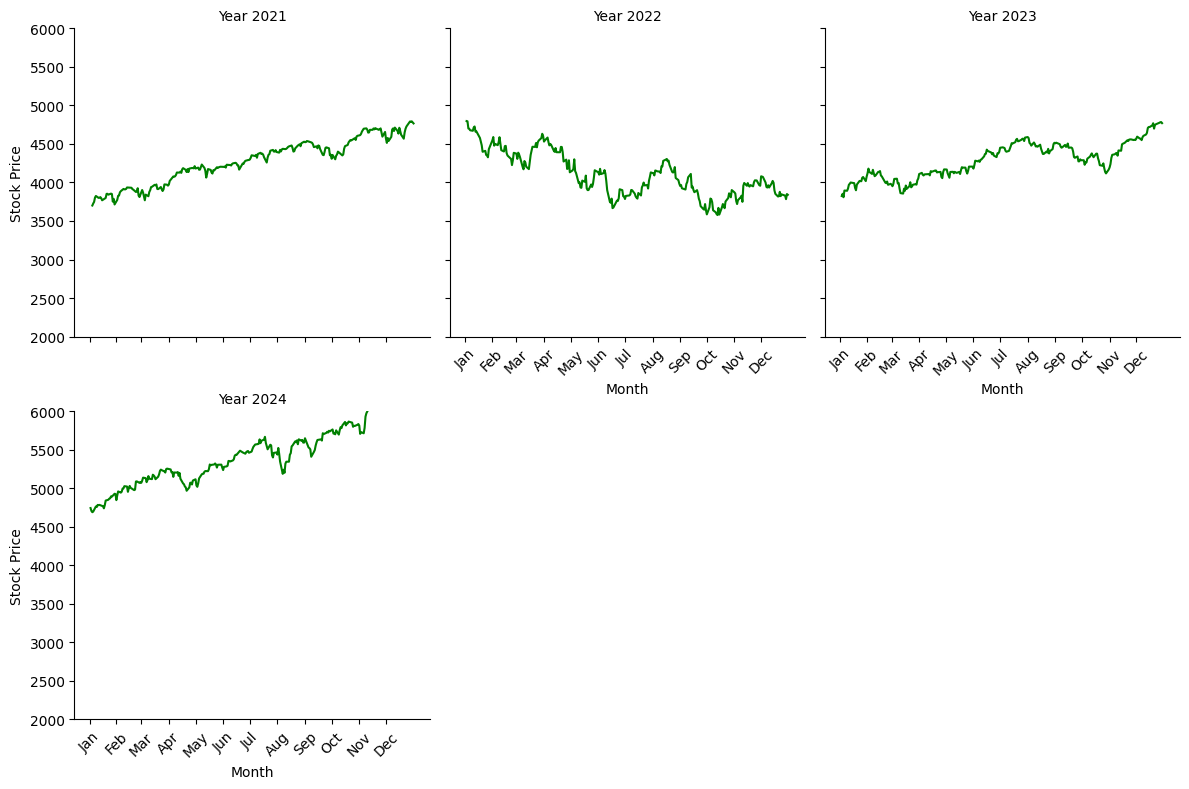

In [79]:
# Ensure your 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year, day of year, and month from the 'Date' column
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear  # Day number within the year (1-366)
df['month'] = df['Date'].dt.month  # Month as number (1-12)
df['month_name'] = df['Date'].dt.month_name()  # Month name (e.g., "January", "February")

# Filter for the years 2021-2024
df_filtered = df[df['year'].between(2021, 2024)]

# Create the FacetGrid, which will facet the plot by year
g = sns.FacetGrid(df_filtered, col='year', col_wrap=3, height=4)  # col_wrap arranges plots in rows
g.map(sns.lineplot, 'day_of_year', 'Close', color = "green")

# Adjust the axis labels and title
g.set_axis_labels('Month', 'Stock Price')
g.set_titles('Year {col_name}')

# Set x-axis ticks to be month names
for ax in g.axes.flat:
    # Map day_of_year to months
    ax.set_xticks([1, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334])  # Approximate day of the year for each month
    
    # Set the tick labels to month names
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    ax.set_ylim(2000, 6000)

    # Rotate x-axis labels for better visibility
    plt.setp(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

<div style="font-size: 24px; color: red;">In 2021, 2023 and 2024, the stock saw gradual overall increases in share price. However, the chaotic 2022 led to major fluctuations and drops in the stock price due to inflation from the Russia Ukraine way and its ripple of effects on energy prices and US economy.<div>

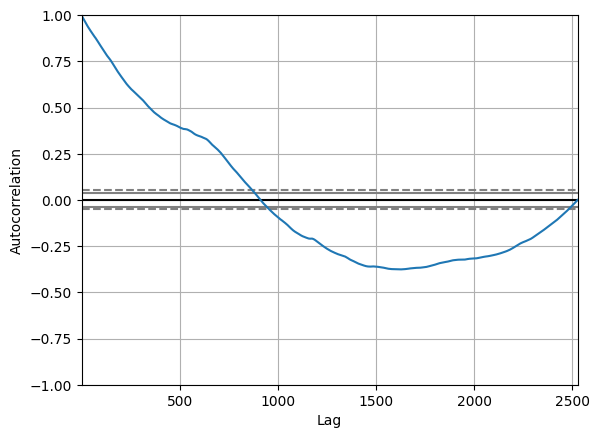

In [8]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["Close"])
pyplot.show()

<div style="font-size: 24px; color: red;">This plot shows there is autocorrelation within our time series data. That is, share price at certain time points in our data are correlated with each other.<div>

# Testing Data for Stationarity (Augmented Dickey-Fuller Test)

Ho: Data is not Stationary \
Ha: Data is Stationary

In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the cleaned data
result = adfuller(df["Close"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.765262
p-value: 0.991054
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: 0.765262
p-value: 0.991054
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


<div style="font-size: 24px; color: red;">P = 0.991, which is greater than alpha of 0.05. We fail to reject the null hypothesis. The evidence is not statistically significant enough to reject the null hypothesis. The data must be differenced in order to achieve stationarity.<div>

In [10]:
# Splitting Data into two time periods to compare properties

median_date = df["Date"].median()
first_half = df[df["Date"] <= median_date]
second_half = df[df["Date"] > median_date]

# Calculate means and variances
mean1 = first_half["Close"].mean()
mean2 = second_half["Close"].mean()
variance1 = first_half["Close"].var()
variance2 = second_half["Close"].var()

# Print rounded results
print('Mean1 = %.2f, Mean2 = %.2f' % (round(mean1, 2), round(mean2, 2)))
print('Variance1 = %.2f, Variance2 = %.2f' % (round(variance1, 2), round(variance2, 2)))


Mean1 = 2416.33, Mean2 = 4176.27
Variance1 = 116428.98, Variance2 = 535930.87
Mean1 = 2416.33, Mean2 = 4176.27
Variance1 = 116428.98, Variance2 = 535930.87


<div style="font-size: 24px; color: red;">The mean closing price for the S&P 500 stock was much higher from 2019-2024 than it was from 2014-2019. This displays the growth of the stock and its share price over time. Additionally, the second half of the data experiences much more variance than the first half. This is an example of unstationary data caused by Heteroskedasticity, or unequal variances throughout the time period. In conclusion, the values for adjusted closing price are not stationary, and must be modified to run an ARIMA model.<div>

## Differencing Data to Achieve Stationary Data (d = 1)

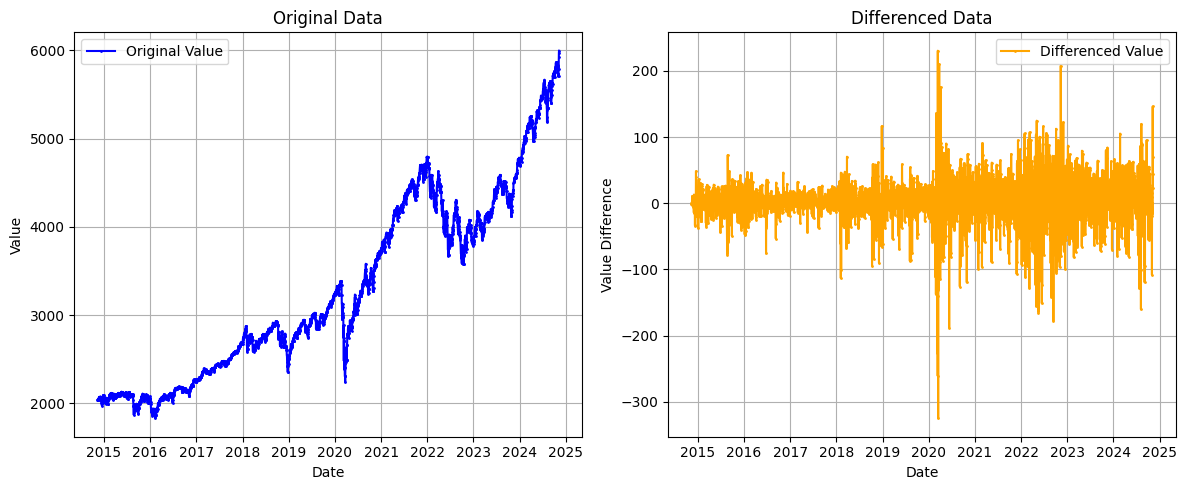

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

plot_df = df

# Step 1: Set the Date column as the index
plot_df = plot_df.set_index('Date')
plot_df = plot_df.asfreq('D', method='ffill')

# Step 2: Difference the 'Value' column by d=1
plot_df['CloseDiff'] = plot_df['Close'].diff(periods=1)

# Step 3: Create the side-by-side plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the original data
axs[0].plot(plot_df.index, plot_df['Close'], marker='o', color='blue', label='Original Value', markersize=1)
axs[0].set_title('Original Data')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].grid()

# Plot the differenced data
axs[1].plot(plot_df.index, plot_df['CloseDiff'], marker='o', color='orange', label='Differenced Value', markersize=1)
axs[1].set_title('Differenced Data')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Value Difference')
axs[1].legend()
axs[1].grid()

# Show the plots
plt.tight_layout()
plt.show()


# Comparing Properties of First and Second Half of Dataset

In [12]:
# Splitting Data into two time periods to compare properties

median_date = plot_df.index.to_series().median()
first_half = plot_df[plot_df.index <= median_date]
second_half = plot_df[plot_df.index > median_date]

# Calculate means and variances
mean1 = first_half["CloseDiff"].mean()
mean2 = second_half["CloseDiff"].mean()
variance1 = first_half["CloseDiff"].var()
variance2 = second_half["CloseDiff"].var()

# Print rounded results
print('Mean1 = %.2f, Mean2 = %.2f' % (round(mean1, 2), round(mean2, 2)))
print('Variance1 = %.2f, Variance2 = %.2f' % (round(variance1, 2), round(variance2, 2)))


Mean1 = 0.58, Mean2 = 1.59
Variance1 = 290.22, Variance2 = 1598.41
Mean1 = 0.58, Mean2 = 1.59
Variance1 = 290.22, Variance2 = 1598.41


<div style="font-size: 24px; color: red;">The difference in first and second half means and variances is much less significant compared to the original data for adjusted closing price. This is encouraging and shows that by differencing our data by 1 day achieves a much more stable and consistent set of values.<div>

In [13]:
from statsmodels.tsa.stattools import adfuller

# Drop rows with NaN values caused by Differencing
cleaned_df = plot_df[plot_df["CloseDiff"].notna() & ~np.isinf(plot_df["CloseDiff"])]

# Perform the ADF test on the cleaned data
result = adfuller(cleaned_df["CloseDiff"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -16.008250
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
ADF Statistic: -16.008250
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


<div style="font-size: 24px; color: red;">P = 0.0000, which is less than alpha of 0.05. We can reject the null hypothesis and conclude that the data is stationary after implementing a d = 1 differencing on Adjusted Closing Price.<div>

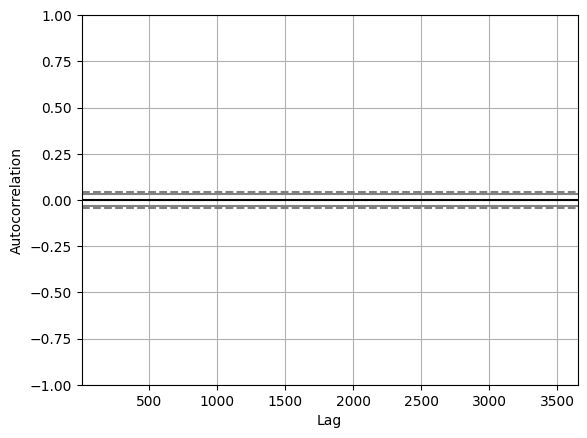

In [14]:
autocorrelation_plot(plot_df["CloseDiff"])
pyplot.show()

In [147]:
from pmdarima.arima.utils import ndiffs

ndiffs(df["Close"], test = "adf")

1

# Extracting Seasonality and Trends

In [159]:
decompose_df = df[["Date","Close"]]
decompose_df = decompose_df.set_index('Date')
decompose_df = decompose_df.asfreq('D', method='ffill')


In [161]:
decomposition = seasonal_decompose(decompose_df["Close"], model = "additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

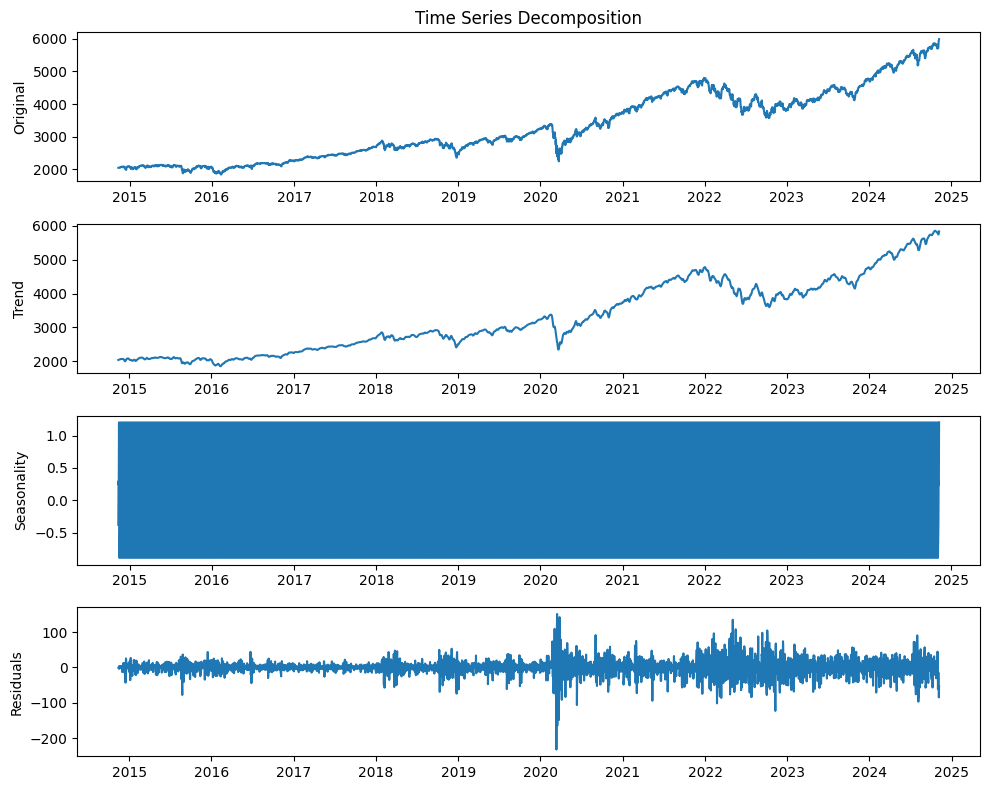

In [164]:
# Create subplots for each component
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

# Plot the original time series
axes[0].plot(decompose_df, label='Original')
axes[0].set_ylabel('Original')

# Plot the trend component
axes[1].plot(trend, label='Trend')
axes[1].set_ylabel('Trend')

# Plot the seasonal component
axes[2].plot(seasonal, label='Seasonality')
axes[2].set_ylabel('Seasonality')

# Plot the residuals component
axes[3].plot(residuals, label='Residuals')
axes[3].set_ylabel('Residuals')

# Add titles and legends
axes[0].set_title('Time Series Decomposition')
plt.tight_layout()
plt.show()

# Modeling the Data with ARIMA

## Base Model with order (5,1,0)

In [15]:
from statsmodels.tsa.arima.model import ARIMA
plot_df = plot_df.asfreq('D')

model = ARIMA(plot_df["Close"], order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3651
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -17667.211
Date:                Mon, 11 Nov 2024   AIC                          35346.423
Time:                        09:27:50   BIC                          35383.637
Sample:                    11-11-2014   HQIC                         35359.676
                         - 11-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0698      0.009     -8.080      0.000      -0.087      -0.053
ar.L2          0.0116      0.010      1.132      0.258      -0.008       0.032
ar.L3          0.0221      0.009      2.397      0.0

<div style="font-size: 24px; color: red;">The Base model displayed an AIC of 35346 and a BIC of 35383, which leaves room for improvement.<div>

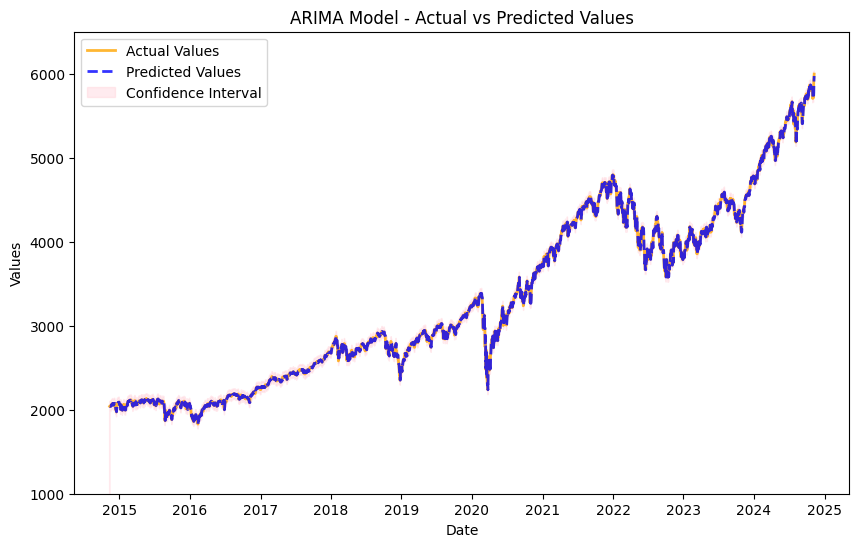

In [16]:
import matplotlib.pyplot as plt

predictions = model_fit.get_prediction(start=plot_df.index[0], end=plot_df.index[-1], dynamic=False)
pred_mean = predictions.predicted_mean  # Extract predicted values
pred_mean = pred_mean[1:]
pred_ci = predictions.conf_int()  # Confidence intervals for predictions

actual_values = plot_df["Close"]

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values, label="Actual Values", color="orange", alpha=0.8, linewidth=2)
plt.plot(pred_mean.index, pred_mean, label="Predicted Values", color="blue", linestyle="--", alpha=0.8, linewidth=2)

plt.fill_between(pred_ci.index, 
                 pred_ci.iloc[:, 0], 
                 pred_ci.iloc[:, 1], color="pink", alpha=0.3, label="Confidence Interval")
plt.ylim(1000, 6500)
plt.title("ARIMA Model - Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()


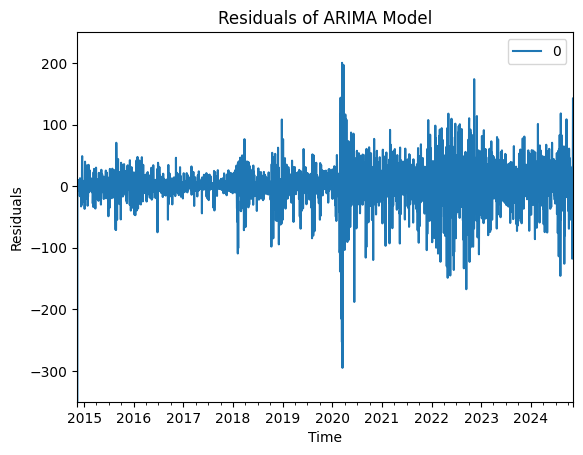

In [192]:
# Line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals[1:].plot()

plt.title("Residuals of ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.ylim(-350,250)
pyplot.show()


<div style="font-size: 24px; color: red;">Our residuals plot shows the most amount of deviation was in 2020, during the unpredictable Covid-19 pandemic. The stock market tanked as a whole due to economic inactivity at the time.<div>

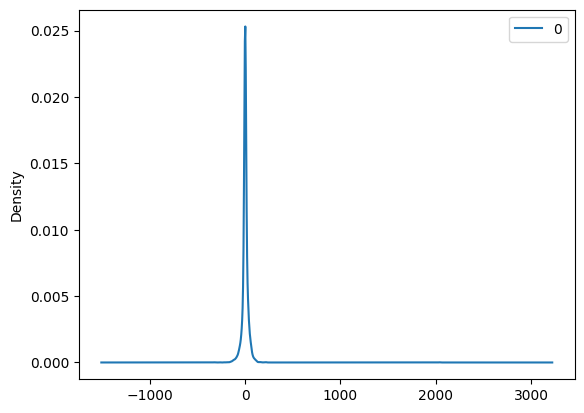

In [18]:
# Density plot of residuals
residuals.plot(kind='kde')
plt.title("Residuals Distribution of ARIMA Model")
plt.xlabel("Residual Value")
plt.ylabel("Density")
pyplot.show()

<div style="font-size: 24px; color: red;">From the density plot, we can see that the residuals are mostly small values close to 0, which is encouraging.<div>

In [19]:
# Summary stats of residuals
print(residuals.describe())

                 0
count  3651.000000
mean      1.687911
std      45.541713
min    -326.468250
25%      -4.909977
50%       0.282795
75%       9.305698
max    2039.680000
                 0
count  3651.000000
mean      1.687911
std      45.541713
min    -326.468250
25%      -4.909977
50%       0.282795
75%       9.305698
max    2039.680000


In [20]:
from sklearn.metrics import mean_squared_error

# In-sample predictions (adjusted to start at index 1)
predictions = model_fit.predict(start=1, end=len(plot_df["Close"]) - 1)
mae = mean_absolute_error(plot_df["Close"][1:], predictions)
mape = mean_absolute_percentage_error(plot_df["Close"][1:], predictions)

print("In-sample MAE:", round(mae, 3))
print("In-sample MAPE:", round(mape * 100, 2), "%")



In-sample MAE: 17.294
In-sample MAPE: 0.52 %
In-sample MAE: 17.294
In-sample MAPE: 0.52 %


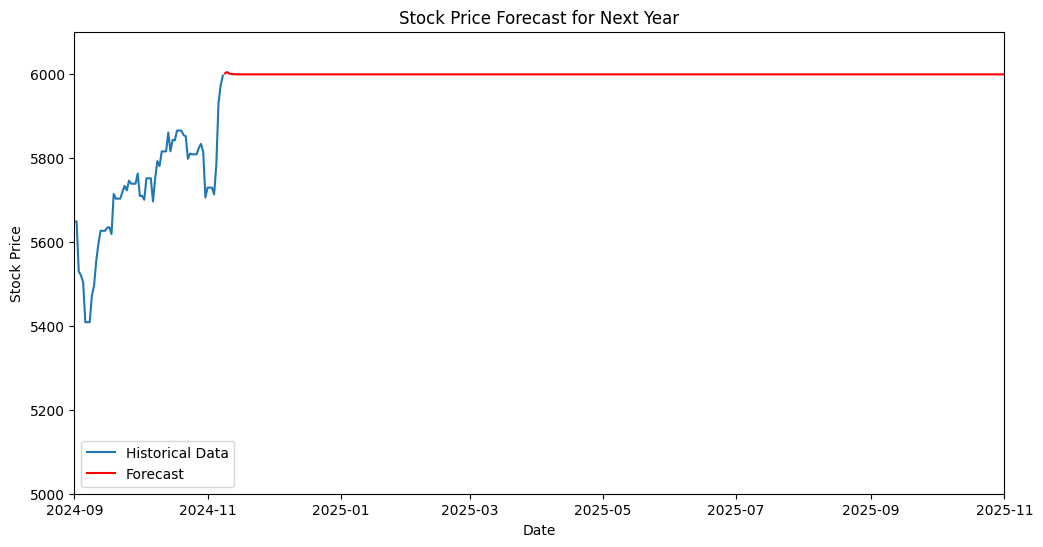

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Number of days to forecast (e.g., 365 for one year if daily data)
forecast_days = 365

# Forecasting the next year
forecast = model_fit.forecast(steps=forecast_days)

# Creating a DataFrame with the forecast results and dates
forecast_index = pd.date_range(start=plot_df.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_index)
forecast_df.columns = ["Forecast"]

# Plotting the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(plot_df["Close"], label="Historical Data")
plt.plot(forecast_df["Forecast"], label="Forecast", color="red")
plt.xlabel("Date")

start_date = pd.to_datetime("2024-09-01")  
end_date = pd.to_datetime("2025-11-01")    
plt.xlim(start_date, end_date)

plt.ylabel("Stock Price")
plt.ylim(5000, 6100)

plt.title("Stock Price Forecast for Next Year")
plt.legend()
plt.show()


<div style="font-size: 24px; color: red;">The initial model is not picking up trends very well. Perhaps it needs some tuning.<div>

In [165]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

series = pd.read_csv('S_P_500_Stock.csv', header=0, index_col=0, parse_dates=True, 
                     date_format='%m/%d/%Y', usecols=[0, 1])
series.index = series.index.to_period('D')

# split into train and test sets
X = series.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:]

# Fit the model on the entire training set
model = auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Forecast the entire test set
forecast = model.predict(n_periods=len(test))

# Evaluate the performance
mae = sqrt(mean_absolute_error(test, forecast))
print('Test MAE: %.3f' % mae)


Performing stepwise search to minimize aic
Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19423.108, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19490.095, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19477.607, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19423.108, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19490.095, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19477.607, Time=0.06 sec


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19478.830, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19492.077, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19478.830, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19492.077, Time=0.02 sec


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19477.685, Time=0.96 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19477.685, Time=0.96 sec


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19477.879, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19477.879, Time=0.87 sec


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19424.569, Time=2.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19424.569, Time=2.38 sec


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=19479.665, Time=2.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=19479.665, Time=2.63 sec


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19476.790, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19476.790, Time=0.60 sec


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=19478.207, Time=1.98 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=19478.207, Time=1.98 sec


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19478.665, Time=2.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19478.665, Time=2.19 sec


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=19426.934, Time=3.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=19426.934, Time=3.22 sec


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=19425.613, Time=0.73 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 18.099 seconds
Test MAE: 17.905
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=19425.613, Time=0.73 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 18.099 seconds
Test MAE: 17.905


# Hyperparameter Tuning with Grid Search Cross Validation

In [31]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.75)
	train = X[0:train_size]
	test =  X[train_size:]
	
	# fit the ARIMA model once on the training data
	model = ARIMA(train, order=arima_order)
	model_fit = model.fit()  # Fit the model on the entire training set

    # make predictions for the test set
	predictions = model_fit.forecast(steps=len(test))  # Forecast for all time steps in one go
    
    # calculate out-of-sample error (MAE)
	error = mean_absolute_error(test, predictions)
	return error

In [32]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MAE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MAE=%.3f' % (best_cfg, best_score))

In [43]:
import warnings
series = pd.read_csv('S_P_500_Stock.csv', header=0, index_col=0, parse_dates=True, 
                     date_format='%m/%d/%Y', usecols=[0, 1])
series.index = series.index.to_period('D')

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MAE=1582.108
ARIMA(0, 0, 0) MAE=1582.108


ARIMA(0, 0, 1) MAE=1581.201
ARIMA(0, 0, 1) MAE=1581.201


ARIMA(0, 0, 2) MAE=1580.186
ARIMA(0, 1, 0) MAE=281.659
ARIMA(0, 1, 1) MAE=281.436
ARIMA(0, 0, 2) MAE=1580.186
ARIMA(0, 1, 0) MAE=281.659
ARIMA(0, 1, 1) MAE=281.436


ARIMA(0, 1, 2) MAE=281.454
ARIMA(0, 2, 0) MAE=1243.816
ARIMA(0, 1, 2) MAE=281.454
ARIMA(0, 2, 0) MAE=1243.816


ARIMA(0, 2, 1) MAE=249.209
ARIMA(0, 2, 1) MAE=249.209


ARIMA(0, 2, 2) MAE=250.818
ARIMA(1, 0, 0) MAE=425.917
ARIMA(0, 2, 2) MAE=250.818
ARIMA(1, 0, 0) MAE=425.917


ARIMA(1, 0, 1) MAE=391.839
ARIMA(1, 0, 1) MAE=391.839


ARIMA(1, 0, 2) MAE=407.074
ARIMA(1, 1, 0) MAE=281.421
ARIMA(1, 0, 2) MAE=407.074
ARIMA(1, 1, 0) MAE=281.421


ARIMA(1, 1, 1) MAE=281.500
ARIMA(1, 1, 1) MAE=281.500


ARIMA(1, 1, 2) MAE=281.535
ARIMA(1, 2, 0) MAE=737.914
ARIMA(1, 1, 2) MAE=281.535
ARIMA(1, 2, 0) MAE=737.914


ARIMA(1, 2, 1) MAE=310.165
ARIMA(1, 2, 1) MAE=310.165


ARIMA(1, 2, 2) MAE=318.769
ARIMA(1, 2, 2) MAE=318.769


ARIMA(2, 0, 0) MAE=394.207
ARIMA(2, 0, 0) MAE=394.207


ARIMA(2, 0, 1) MAE=396.007
ARIMA(2, 0, 1) MAE=396.007


ARIMA(2, 0, 2) MAE=404.520
ARIMA(2, 1, 0) MAE=281.494
ARIMA(2, 0, 2) MAE=404.520
ARIMA(2, 1, 0) MAE=281.494


ARIMA(2, 1, 1) MAE=281.519
ARIMA(2, 1, 1) MAE=281.519


ARIMA(2, 1, 2) MAE=282.027
ARIMA(2, 1, 2) MAE=282.027


ARIMA(2, 2, 0) MAE=105.201
ARIMA(2, 2, 0) MAE=105.201


ARIMA(2, 2, 1) MAE=321.433
ARIMA(2, 2, 1) MAE=321.433


ARIMA(2, 2, 2) MAE=280.461
ARIMA(2, 2, 2) MAE=280.461


ARIMA(4, 0, 0) MAE=403.352
ARIMA(4, 0, 0) MAE=403.352


ARIMA(4, 0, 1) MAE=358.658
ARIMA(4, 0, 1) MAE=358.658


ARIMA(4, 0, 2) MAE=387.272
ARIMA(4, 0, 2) MAE=387.272


ARIMA(4, 1, 0) MAE=281.850
ARIMA(4, 1, 0) MAE=281.850


ARIMA(4, 1, 1) MAE=282.406
ARIMA(4, 1, 1) MAE=282.406


ARIMA(4, 1, 2) MAE=282.222
ARIMA(4, 1, 2) MAE=282.222


ARIMA(4, 2, 0) MAE=133.342
ARIMA(4, 2, 0) MAE=133.342


ARIMA(4, 2, 1) MAE=298.614
ARIMA(4, 2, 1) MAE=298.614


ARIMA(4, 2, 2) MAE=269.702
ARIMA(4, 2, 2) MAE=269.702


ARIMA(6, 0, 0) MAE=399.292
ARIMA(6, 0, 0) MAE=399.292


ARIMA(6, 0, 1) MAE=393.637
ARIMA(6, 0, 1) MAE=393.637


ARIMA(6, 0, 2) MAE=292.580
ARIMA(6, 0, 2) MAE=292.580


ARIMA(6, 1, 0) MAE=282.299
ARIMA(6, 1, 0) MAE=282.299


ARIMA(6, 1, 1) MAE=282.606
ARIMA(6, 1, 1) MAE=282.606


ARIMA(6, 1, 2) MAE=282.243
ARIMA(6, 1, 2) MAE=282.243


ARIMA(6, 2, 0) MAE=106.978
ARIMA(6, 2, 0) MAE=106.978


ARIMA(6, 2, 1) MAE=263.243
ARIMA(6, 2, 1) MAE=263.243


ARIMA(6, 2, 2) MAE=305.562
ARIMA(6, 2, 2) MAE=305.562


ARIMA(8, 0, 0) MAE=406.921
ARIMA(8, 0, 0) MAE=406.921


ARIMA(8, 0, 1) MAE=482.634
ARIMA(8, 0, 1) MAE=482.634


ARIMA(8, 0, 2) MAE=310.359
ARIMA(8, 0, 2) MAE=310.359


ARIMA(8, 1, 0) MAE=281.974
ARIMA(8, 1, 0) MAE=281.974


ARIMA(8, 1, 1) MAE=282.162
ARIMA(8, 1, 1) MAE=282.162


ARIMA(8, 1, 2) MAE=282.208
ARIMA(8, 1, 2) MAE=282.208


ARIMA(8, 2, 0) MAE=110.618
ARIMA(8, 2, 0) MAE=110.618


ARIMA(8, 2, 1) MAE=309.094
ARIMA(8, 2, 1) MAE=309.094


ARIMA(8, 2, 2) MAE=190.113
ARIMA(8, 2, 2) MAE=190.113


ARIMA(10, 0, 0) MAE=415.526
ARIMA(10, 0, 0) MAE=415.526


ARIMA(10, 0, 1) MAE=407.655
ARIMA(10, 0, 1) MAE=407.655


ARIMA(10, 0, 2) MAE=446.744
ARIMA(10, 0, 2) MAE=446.744


ARIMA(10, 1, 0) MAE=281.255
ARIMA(10, 1, 0) MAE=281.255


ARIMA(10, 1, 1) MAE=281.606
ARIMA(10, 1, 1) MAE=281.606


ARIMA(10, 1, 2) MAE=281.553
ARIMA(10, 1, 2) MAE=281.553


ARIMA(10, 2, 0) MAE=204.397
ARIMA(10, 2, 0) MAE=204.397


ARIMA(10, 2, 1) MAE=319.555
ARIMA(10, 2, 1) MAE=319.555


ARIMA(10, 2, 2) MAE=308.598
Best ARIMA(2, 2, 0) MAE=105.201
ARIMA(10, 2, 2) MAE=308.598
Best ARIMA(2, 2, 0) MAE=105.201


In [49]:
def evaluate_models2(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    results = []  # List to store results
    
    # Loop over combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mae = evaluate_arima_model(dataset, order)  # Get MAE for the current model
                    results.append([p, d, q, round(mae)])  # Append the result
                except:
                    continue

    # Convert the results list into a DataFrame
    results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'MAE'])
    
    # Sort the DataFrame by the MAE column in ascending order
    results_df = results_df.sort_values(by='MAE', ascending=True)
    
    # Return the top 10 models
    return results_df


In [50]:
cv_results_df = evaluate_models2(series.values, p_values, d_values, q_values)

In [51]:
cv_results_df = cv_results_df.reset_index(drop = True)
cv_results_df.head(10)

,p,d,q,MAE
0,2,2,0,105
1,6,2,0,107
2,8,2,0,111
3,4,2,0,133
4,8,2,2,190
5,10,2,0,204
6,0,2,1,249
7,0,2,2,251
8,6,2,1,263
9,4,2,2,270


# ARIMA Model with Optimized Parameters

In [179]:
model = ARIMA(plot_df["Close"], order=(20, 2, 20))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3651
Model:               ARIMA(20, 2, 20)   Log Likelihood              -17592.987
Date:                Mon, 11 Nov 2024   AIC                          35267.974
Time:                        11:55:39   BIC                          35522.265
Sample:                    11-11-2014   HQIC                         35358.535
                         - 11-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7117      0.425     -4.030      0.000      -2.544      -0.879
ar.L2         -2.9561      0.452     -6.540      0.000      -3.842      -2.070
ar.L3         -3.9275      1.007     -3.901      0.0

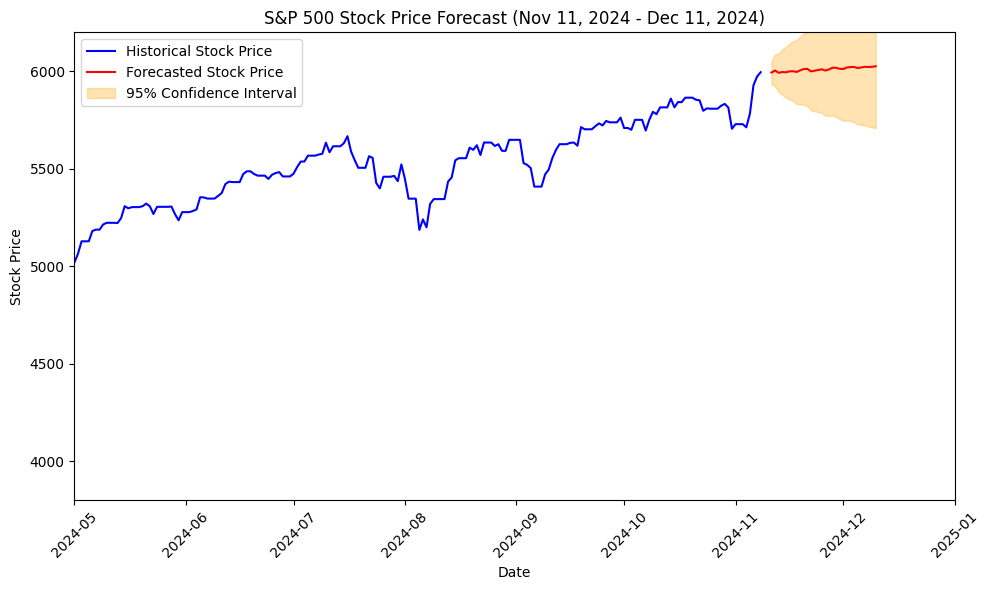

In [193]:
import matplotlib.pyplot as plt

# Forecast for the next 30 days from November 11, 2024 to December 11, 2024
forecast_steps = 30  # Forecast for the next 30 days

# Get forecasted values and confidence intervals using the `get_forecast()` method
forecast_results = model_fit.get_forecast(steps=forecast_steps)

# Forecasted values (predicted mean) and confidence intervals
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int(alpha=0.05)  # 95% confidence interval

# Create a date range for the forecast period (Nov 11, 2024 to Dec 11, 2024)
forecast_dates = pd.date_range(start="2024-11-11", periods=forecast_steps, freq="D")

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(list(forecast_values), index=forecast_dates)
forecast_df.columns = ["Forecast"]

# Ensure that the confidence interval has the same length as the forecast
lower_bound = conf_int.iloc[:, 0]
upper_bound = conf_int.iloc[:, 1]

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(plot_df.index, plot_df["Close"], label="Historical Stock Price", color="blue")
plt.plot(forecast_df.index, forecast_df["Forecast"], label="Forecasted Stock Price", color="red")

# Plotting the confidence intervals
plt.fill_between(forecast_df.index, 
                 lower_bound, 
                 upper_bound, 
                 color="orange", alpha=0.3, label="95% Confidence Interval")

# Title and labels

plt.title('S&P 500 Stock Price Forecast (Nov 11, 2024 - Dec 11, 2024)')
plt.xlabel('Date')
start_date = pd.to_datetime("2024-05-01")  
end_date = pd.to_datetime("2025-01-01")    
plt.xlim(start_date, end_date)
plt.ylabel('Stock Price')
plt.ylim(3800, 6200)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


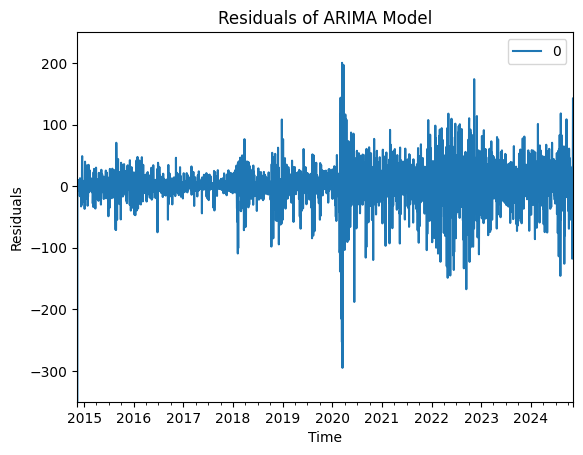

In [187]:
residuals = pd.DataFrame(model_fit.resid)
residuals[1:].plot()
plt.title("Residuals of ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.ylim(-350,250)

pyplot.show()
